# Homework 04 - Evaluation Metrics for Classification


In this homework, we will use the lead scoring dataset Bank Marketing dataset. Download it from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv).


In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

## Dataset Import


In this homework, we will use the lead scoring dataset Bank Marketing dataset. Download it from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv).


In this dataset our desired target for classification task will be `converted` variable - has the client signed up to the platform or not. 

In [143]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv')
df

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1
...,...,...,...,...,...,...,...,...,...
1457,referral,manufacturing,1,NaN,self_employed,north_america,4,0.53,1
1458,referral,technology,3,65259.0,student,europe,2,0.24,1
1459,paid_ads,technology,1,45688.0,student,north_america,3,0.02,1
1460,referral,NaN,5,71016.0,self_employed,north_america,0,0.25,1


In [144]:
df.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

## Data preparation and data split

* Check if the missing values are presented in the features.
* If there are missing values:
    * For caterogiral features, replace them with 'NA'
    * For numerical features, replace with with 0.0 


Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` function for that with `random_state=1`


In [145]:
# Sum of null values in each column
def list_null_values(df):
    return df.isnull().sum()

In [146]:
# Function to fill missing values with a value
def fill_null_values(df, cat_fill_value, num_fill_value):
    cat_columns = df.select_dtypes(include=['object']).columns
    num_columns = df.select_dtypes(include=['int64','float64']).columns
    
    # Fill NaNs for categorical columns with the provided value
    df[cat_columns] = df[cat_columns].fillna(cat_fill_value)
    
    # Fill NaNs for numerical columns with the provided value
    df[num_columns] = df[num_columns].fillna(num_fill_value)
    
    return df

In [147]:
list_null_values(df)

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [148]:
df =fill_null_values(df=df, cat_fill_value='NA', num_fill_value=0.0)
df

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NA,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NA,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1
...,...,...,...,...,...,...,...,...,...
1457,referral,manufacturing,1,0.0,self_employed,north_america,4,0.53,1
1458,referral,technology,3,65259.0,student,europe,2,0.24,1
1459,paid_ads,technology,1,45688.0,student,north_america,3,0.02,1
1460,referral,NA,5,71016.0,self_employed,north_america,0,0.25,1


In [149]:
list_null_values(df)

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

In [150]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [151]:
len(df_train),len(df_test), len(df_val)

(876, 293, 293)

In [152]:
df_full_train = df_full_train.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [153]:
y_full_train = df_full_train.converted.values
y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

In [154]:
target='converted'

In [155]:
del df_full_train[target]
del df_train[target]
del df_val[target]
del df_test[target] 

In [156]:
categorical = list(df_full_train.select_dtypes(include=['object']).columns)
numerical =list(df_full_train.select_dtypes(include=['int64','float64']).columns)
numerical

['number_of_courses_viewed',
 'annual_income',
 'interaction_count',
 'lead_score']

## Question 1: ROC AUC feature importance

ROC AUC could also be used to evaluate feature importance of numerical variables. 

Let's do that

* For each numerical variable, use it as score (aka prediction) and compute the AUC with the `y` variable as ground truth.
* Use the training dataset for that


If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['balance']`)

AUC can go below 0.5 if the variable is negatively correlated with the target variable. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

- `lead_score`
- `number_of_courses_viewed`
- [x] `interaction_count`
- `annual_income`



In [157]:
for i in numerical:
    auc = roc_auc_score(y_train, df_train[i])
    print (f"{i}: auc: {auc}")

number_of_courses_viewed: auc: 0.761438552686335
annual_income: auc: 0.538337494798169
interaction_count: auc: 0.7197718860196685
lead_score: auc: 0.6264729395273452


In [158]:
for i in numerical:
    auc = roc_auc_score(y_train, df_train[i])
    if auc <0.5:
        auc = roc_auc_score(y_train, -df_train[i])
    print (f"AOC value for {i}: {auc}")

AOC value for number_of_courses_viewed: 0.761438552686335
AOC value for annual_income: 0.538337494798169
AOC value for interaction_count: 0.7197718860196685
AOC value for lead_score: 0.6264729395273452


## Question 2: Training the model

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```python
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.32
- 0.52
- 0.72
- 0.92

In [159]:
# One-hot encoding
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

test_dict = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(test_dict)

In [160]:
# Initialization of logistic regression model
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

# Train model
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [161]:
y_pred = model.predict_proba(X_val)[:, 1]
converted_decision = (y_pred >= 0.5)

## Acuracy
(y_val == converted_decision).mean()

0.7303754266211604

In [162]:
# auc
auc_val = roc_auc_score(y_val, y_pred)
print(f"AUC: {round(auc_val,3)}")

AUC: 0.804


## Question 3: Precision and Recall

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

At which threshold precision and recall curves intersect?

* 0.145
* 0.345
* [x] 0.545
* 0.745




In [163]:
from sklearn.metrics import precision_score, recall_score



to generate numbers from 0 to 1 with a step size of 0.01 for thresholds I calculated the number of steps manually as: num = (1-0 ) /0.01 = 101
thresholds = np.linspace(0, 1, 0.01)

In [164]:
def precision_recall_table(y_val,y_pred):
                # np.linspace(start, stop, num)
    thresholds = np.linspace(0.0, 1.0, 101)
    scores=[]
    #precision_recall= {}
            
    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)
        
        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)
    
        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()
    
        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        # Calculate precision and recall
        p = tp / (tp + fp) if (tp + fp) > 0 else 0  # Avoid division by zero
        r = tp / (tp + fn) if (tp + fn) > 0 else 0  # Avoid division by zero

        accuracy = accuracy_score(y_val, y_pred >= t)
        scores.append((t, tp, fp, fn, tn, p, r, accuracy))
        
    # Create DataFrame with scores
    columns = ['threshold', 'tp', 'fp', 'fn', 'tn', 'p', 'r','accuracy']
    df_scores = pd.DataFrame(scores, columns=columns)

    # Add True Positive Rate (TPR) and False Positive Rate (FPR)
    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)  # Sensitivity or Recall
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)  # Fall-out
    return df_scores
        

In [165]:
precision_recall_table(y_val,y_pred)

,threshold,tp,fp,fn,tn,p,r,accuracy,tpr,fpr
0,0.00,181,112,0,0,0.617747,1.000000,0.617747,1.000000,1.0
1,0.01,181,112,0,0,0.617747,1.000000,0.617747,1.000000,1.0
2,0.02,181,112,0,0,0.617747,1.000000,0.617747,1.000000,1.0
3,0.03,181,112,0,0,0.617747,1.000000,0.617747,1.000000,1.0
4,0.04,181,112,0,0,0.617747,1.000000,0.617747,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...
96,0.96,1,0,180,112,1.000000,0.005525,0.385666,0.005525,0.0
97,0.97,0,0,181,112,0.000000,0.000000,0.382253,0.000000,0.0
98,0.98,0,0,181,112,0.000000,0.000000,0.382253,0.000000,0.0
99,0.99,0,0,181,112,0.000000,0.000000,0.382253,0.000000,0.0


In [168]:
def precision_recall(y_val,y_pred):
                # np.linspace(start, stop, num)
           
    thresholds = np.linspace(0.0, 1.0, 101)
    scores=[]
    #precision_recall= {}
            
    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)
        
        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)
    
        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()
    
        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        # Calculate precision and recall
        p = tp / (tp + fp) if (tp + fp) > 0 else 0  # Avoid division by zero
        r = tp / (tp + fn) if (tp + fn) > 0 else 0  # Avoid division by zero

        accuracy = accuracy_score(y_val, y_pred >= t)
        scores.append((t, tp, fp, fn, tn, p, r, accuracy))
        
    # Create DataFrame with scores
    columns = ['threshold', 'tp', 'fp', 'fn', 'tn', 'p', 'r','accuracy']
    df_scores = pd.DataFrame(scores, columns=columns)

    # Add True Positive Rate (TPR) and False Positive Rate (FPR)
    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)  # Sensitivity or Recall
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)  # Fall-out
    
    plt.plot(df_scores['threshold'], df_scores['p'], label='Precision')
    plt.plot(df_scores['threshold'], df_scores['r'], label='Recall')
    plt.plot(df_scores['threshold'], df_scores['accuracy'], label='Accuracy')
    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.title('Precision and Recall vs Threshold')
    plt.legend()
    plt.grid(True)
    plt.show()
            

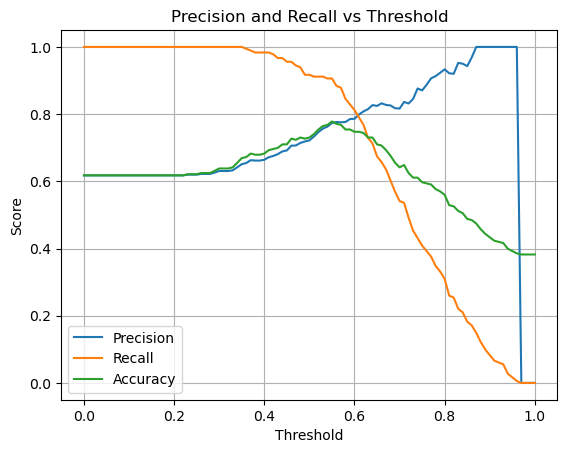

In [169]:
precision_recall(y_val,y_pred)

## Question 4: F1 score

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

- 0.14
- 0.34
- [x] 0.54
- 0.74




In [185]:
def p_r_f1_table(y_val, y_pred):
    # np.linspace(start, stop, num) creates 101 thresholds between 0.0 and 1.0
    thresholds = np.linspace(0.0, 1.0, 101)

    scores=[]
            
    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)
        
        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)
    
        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()
    
        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        # Calculate precision and recall
        p = tp / (tp + fp) if (tp + fp) > 0 else 0  # Avoid division by zero
        r = tp / (tp + fn) if (tp + fn) > 0 else 0  # Avoid division by zero

        # Accuracy
        accuracy = accuracy_score(y_val, y_pred >= t)

        # Calculate F1 Score
        f1 = 2 * (p * r) / (p + r) if (p + r) > 0 else 0

        # Store results for each threshold
        scores.append((t, tp, fp, fn, tn, p, r,accuracy,f1))

    # Create DataFrame with scores
    columns = ['threshold', 'tp', 'fp', 'fn', 'tn', 'precision', 'recall','accuracy', 'F1']
    df_scores = pd.DataFrame(scores, columns=columns)

    # Add True Positive Rate (TPR) and False Positive Rate (FPR)
    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)  # Sensitivity or Recall
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)  # Fall-out

    return df_scores

In [186]:
p_r_f1_table(y_val, y_pred)

,threshold,tp,fp,fn,tn,precision,recall,accuracy,F1,tpr,fpr
0,0.00,181,112,0,0,0.617747,1.000000,0.617747,0.763713,1.000000,1.0
1,0.01,181,112,0,0,0.617747,1.000000,0.617747,0.763713,1.000000,1.0
2,0.02,181,112,0,0,0.617747,1.000000,0.617747,0.763713,1.000000,1.0
3,0.03,181,112,0,0,0.617747,1.000000,0.617747,0.763713,1.000000,1.0
4,0.04,181,112,0,0,0.617747,1.000000,0.617747,0.763713,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...
96,0.96,1,0,180,112,1.000000,0.005525,0.385666,0.010989,0.005525,0.0
97,0.97,0,0,181,112,0.000000,0.000000,0.382253,0.000000,0.000000,0.0
98,0.98,0,0,181,112,0.000000,0.000000,0.382253,0.000000,0.000000,0.0
99,0.99,0,0,181,112,0.000000,0.000000,0.382253,0.000000,0.000000,0.0


In [191]:
def p_r_f1_viz(y_val, y_pred):
    # np.linspace(start, stop, num) creates 101 thresholds between 0.0 and 1.0
    thresholds = np.linspace(0.0, 1.0, 101)

    scores=[]
            
    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)
        
        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)
    
        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()
    
        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        # Calculate precision and recall
        p = tp / (tp + fp) if (tp + fp) > 0 else 0  # Avoid division by zero
        r = tp / (tp + fn) if (tp + fn) > 0 else 0  # Avoid division by zero

        accuracy = (tp + tn) / (tp + tn + fp + fn) 

        # Calculate F1 Score
        f1 = 2 * (p * r) / (p + r) if (p + r) > 0 else 0

        # Store results for each threshold
        scores.append((t, tp, fp, fn, tn, p, r, accuracy, f1))

    # Create DataFrame with scores
    columns = ['threshold', 'tp', 'fp', 'fn', 'tn', 'precision', 'recall','accuracy', 'F1']
    df_scores = pd.DataFrame(scores, columns=columns)

    #plt.plot(df_scores['threshold'], df_scores['p'], label='Precision')
    #plt.plot(df_scores['threshold'], df_scores['r'], label='Recall')
    #plt.plot(df_scores['threshold'], df_scores['accuracy'], label='Accuracy')
    plt.plot(df_scores['threshold'], df_scores['F1'], label='F1')
    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.title('F1')
    plt.legend()
    plt.grid(True)
    plt.show()

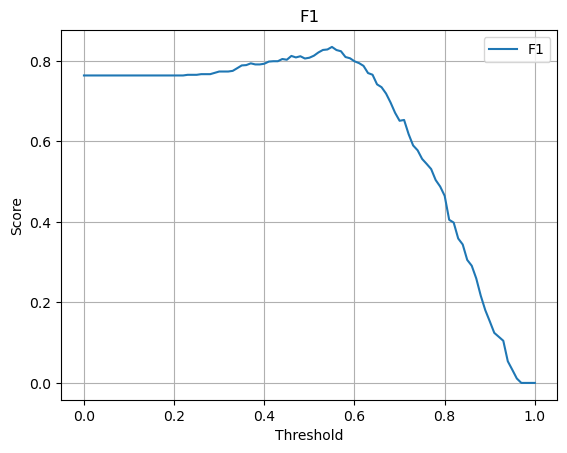

In [192]:
p_r_f1_viz(y_val, y_pred)

## Question 5: 5-Fold CV


Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation

How large is standard deviation of the scores across different folds?

- 0.0001
- 0.006
- 0.06
- 0.36




## Question 6: Hyperparameter Tuning

Now let's use 5-Fold cross-validation to find the best parameter `C`

* Iterate over the following `C` values: `[0.000001, 0.001, 1]`
* Initialize `KFold` with the same parameters as previously
* Use these parameters for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which `C` leads to the best mean score?

- 0.000001
- 0.001
- 1

If you have ties, select the score with the lowest std. If you still have ties, select the smallest `C`.

## Submit the results

* Submit your results here: https://courses.datatalks.club/ml-zoomcamp-2025/homework/hw04
* If your answer doesn't match options exactly, select the closest one